# Tugas 1

## Bisnis Understanding

Harga cabai merah besar di Jawa Timur sering menjadi perhatian karena perannya yang sangat penting dalam kehidupan sehari-hari masyarakat. Cabai merah besar merupakan salah satu komoditas utama yang banyak digunakan sebagai bahan dasar masakan di Indonesia. Di Jawa Timur, cabai merah besar tidak hanya menjadi kebutuhan rumah tangga, tetapi juga digunakan secara luas oleh industri kuliner, hotel, dan restoran. Dengan demikian, fluktuasi harganya memiliki dampak langsung pada perekonomian, baik skala mikro maupun makro.

Di sisi lain, ketidakpastian harga ini juga menyulitkan para pedagang dalam mengambil keputusan. Mereka harus mengatur stok dengan hati-hati untuk menghindari kerugian akibat penurunan harga mendadak. Konsumen, di lain pihak, kerap kali merasa bingung untuk memutuskan kapan waktu terbaik membeli dalam jumlah besar, terutama saat menjelang hari besar seperti Ramadan atau Lebaran, ketika permintaan meningkat tajam.

Dari konteks ini, saya memutuskan untuk menggunakan data harga cabai merah besar di Jawa Timur untuk membantu menyelesaikan sebagian dari masalah ini. Tujuannya adalah memprediksi harga cabai satu minggu ke depan menggunakan data historis yang telah tersedia. Dengan prediksi ini, para petani bisa memiliki gambaran lebih jelas tentang kapan waktu terbaik untuk memanen dan mendistribusikan hasil panen mereka. Para pedagang juga dapat menggunakan informasi prediksi ini untuk mengatur strategi stok mereka, sehingga kerugian akibat ketidakstabilan harga bisa diminimalkan.

Proyek ini diharapkan tidak hanya memberikan manfaat bagi individu atau pelaku usaha, tetapi juga dapat mendukung pemerintah daerah dalam merancang kebijakan yang lebih baik untuk stabilisasi harga cabai. Dengan alat prediksi yang andal, pemerintah dapat mengambil langkah antisipasi seperti menyediakan cadangan pasokan, memperbaiki distribusi, atau memberikan subsidi kepada petani di saat harga rendah.

Menggunakan teknologi seperti machine learning untuk memprediksi harga adalah langkah yang relevan di era digital ini. Dengan memanfaatkan data historis yang kaya dan teknik analisis yang canggih, kita dapat membantu menciptakan solusi yang lebih berkelanjutan bagi seluruh pihak yang terlibat dalam rantai pasok cabai merah besar. Itulah alasan mengapa saya mengambil data harga cabai merah besar di Jawa Timur sebagai fokus dari analisis ini.

Harga cabai merah besar di Jawa Timur sangat fluktuatif, memengaruhi petani, pedagang, dan konsumen. Untuk mengatasi tantangan ini, saya memilih metode **regresi linear** untuk memprediksi harga satu minggu ke depan. Regresi linear adalah metode sederhana yang mencari hubungan linier antara harga historis (variabel independen) dan harga masa depan (variabel dependen).  

Model ini dirumuskan sebagai:  
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon$$

di mana \(y\) adalah harga prediksi, dan \(x_1, x_2, ..., x_n\) adalah harga historis.  

Metode ini dipilih karena mudah diimplementasikan, efisien untuk dataset kecil, dan sesuai untuk pola linier sederhana seperti prediksi harga dalam jangka pendek. Dengan hasil prediksi, petani, pedagang, dan konsumen dapat mengambil keputusan yang lebih baik terkait penjualan, stok, atau pembelian. Jika hasilnya kurang akurat, metode yang lebih kompleks dapat dipertimbangkan sebagai langkah berikutnya.  


# Data Understanding

Sebelum mulai membangun model prediksi, kita perlu **memahami data** yang kita miliki. Ini sangat penting karena dengan pemahaman yang baik tentang data, kita bisa membuat keputusan yang tepat dalam pengolahan dan pemodelan.

Langkah pertama adalah **memahami sumber data**. Data yang kita gunakan adalah harga cabai merah besar di Jawa Timur. Harga cabai ini sangat berfluktuasi tergantung berbagai faktor seperti cuaca, pasokan, dan permintaan pasar. Memahami asal-usul data ini membantu kita tahu apakah ada bias atau faktor luar yang mungkin memengaruhi harga.

Selanjutnya, kita harus melihat **struktur data**. Dalam dataset ini, kita memiliki dua kolom utama: satu untuk **tanggal** dan satu lagi untuk **harga cabai**. Ini artinya kita mempelajari bagaimana harga cabai berubah seiring waktu. Tipe data pada kolom tanggal harus diperiksa dan dipastikan sesuai, sementara kolom harga harus berupa angka.

Setelah itu, kita harus **memeriksa kualitas data**. Ini termasuk memeriksa apakah ada **nilai yang hilang** (misalnya, ada data harga yang kosong untuk tanggal tertentu) atau **outlier** (harga yang terlalu tinggi atau terlalu rendah yang tidak wajar). Jika ada masalah seperti ini, kita perlu memutuskan apakah akan menghapus, mengisi, atau mengubah data tersebut.

Kemudian, kita akan **menggunakan statistik deskriptif** untuk memahami lebih dalam tentang harga cabai. Ini termasuk menghitung rata-rata harga, nilai minimum dan maksimum, serta sebaran harga. Statistik ini memberi gambaran apakah harga cabai cenderung stabil atau sangat berfluktuasi.

Visualisasi juga sangat membantu. Dengan membuat **grafik harga seiring waktu**, kita bisa melihat apakah ada tren tertentu, misalnya harga cenderung naik menjelang musim tertentu. **Boxplot** bisa digunakan untuk melihat apakah ada harga yang sangat jauh dari harga lainnya (outlier), yang bisa mengganggu prediksi kita.

Terakhir, kita bisa memeriksa apakah ada **korelasi antara harga dan waktu**. Misalnya, kita bisa lihat apakah harga cabai cenderung lebih tinggi pada bulan tertentu. Korelasi ini bisa membantu model kita mengenali pola-pola dalam data.

##Pengambilan Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

color_pal = sns.color_palette()
plt.style.use("fivethirtyeight")

In [2]:
import pandas as pd

# Memuat data dari file CSV
file_path = '/content/Tabel Harga Berdasarkan Komoditas(tugas1).csv'

# Membaca file dengan delimiter ';'
data = pd.read_csv(file_path, delimiter=';')

# Menghapus kolom yang seluruhnya kosong
data = data.dropna(axis=1, how='all')

# Membersihkan nama kolom dengan menghapus spasi ekstra
data.columns = data.columns.str.strip()

print(data.head())

      Tanggal  Harga
0  01/01/2020  19200
1  08/01/2020  19200
2  15/01/2020  19200
3  22/01/2020  20400
4  29/01/2020  30200


## Periksa Informasi Data

In [3]:
# Memeriksa informasi umum tentang data
print(data.info())

# Memeriksa nilai yang hilang (missing values)
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tanggal  257 non-null    object
 1   Harga    257 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.1+ KB
None
Tanggal    0
Harga      0
dtype: int64


In [4]:
data.describe()

,Harga
count,257.000000
mean,29811.478599
std,9206.428978
min,15600.000000
25%,24150.000000
50%,29150.000000
75%,32900.000000
max,56500.000000


## Plotting Data

Dataframe Bersih:
     Tanggal  Harga
0 2020-01-01  19200
1 2020-01-08  19200
2 2020-01-15  19200
3 2020-01-22  20400
4 2020-01-29  30200


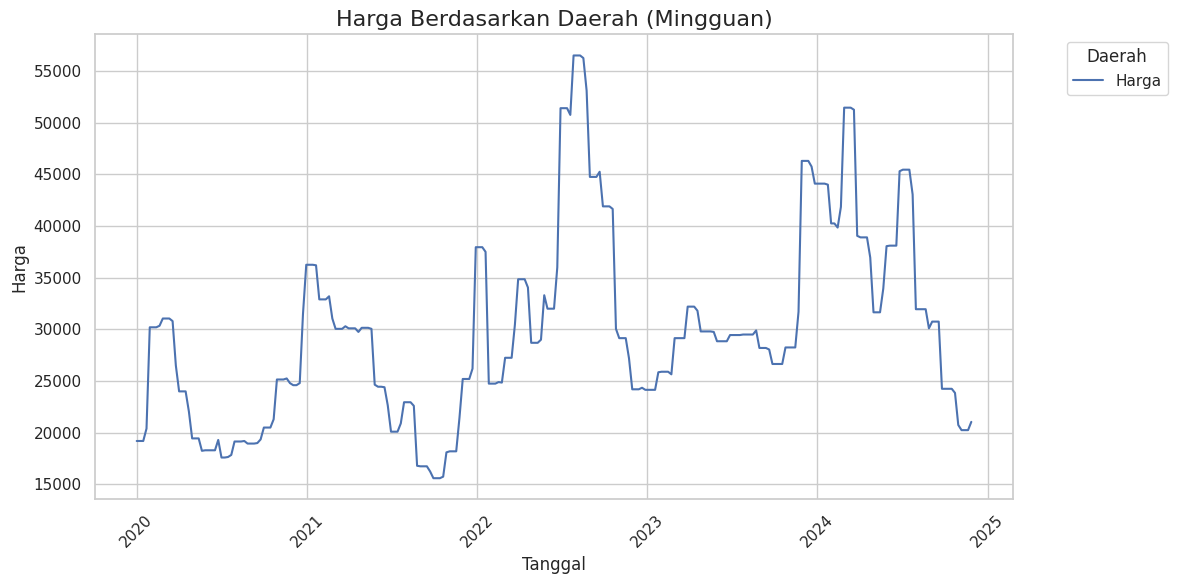

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat data dari file CSV
file_path = '/content/Tabel Harga Berdasarkan Komoditas(tugas1).csv'

# Membaca file dengan delimiter ';'
data = pd.read_csv(file_path, delimiter=';')

# Menghapus kolom yang seluruhnya kosong
data = data.dropna(axis=1, how='all')

# Membersihkan nama kolom dengan menghapus spasi ekstra
data.columns = data.columns.str.strip()

# Membersihkan spasi ekstra pada kolom 'Tanggal'
data['Tanggal'] = data['Tanggal'].str.replace(' ', '', regex=True)

# Memastikan kolom tanggal diubah menjadi tipe datetime tanpa format eksplisit
data['Tanggal'] = pd.to_datetime(data['Tanggal'], dayfirst=True, errors='coerce')

# Menampilkan beberapa baris pertama dari dataframe yang sudah bersih
print("Dataframe Bersih:")
print(data.head())

# Mengatur gaya plotting
sns.set(style="whitegrid")

# Memplot data
plt.figure(figsize=(12, 6))

# Mengasumsikan kolom pertama adalah tanggal dan kolom sisanya berisi harga dari berbagai daerah
for column in data.columns[1:]:
    plt.plot(data['Tanggal'], data[column], label=column)

# Menambahkan detail pada plot
plt.title('Harga Berdasarkan Daerah (Mingguan)', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga', fontsize=12)
plt.legend(title="Daerah", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Sliding Window

In [6]:
import numpy as np
import pandas as pd

# Memuat data dari file CSV
file_path = '/content/Tabel Harga Berdasarkan Komoditas(tugas1).csv'

# Membaca file dengan delimiter ';'
data = pd.read_csv(file_path, delimiter=';', header=0)

# Menghapus kolom yang seluruhnya kosong
data = data.dropna(axis=1, how='all')

# Membersihkan nama kolom dengan menghapus spasi ekstra
data.columns = data.columns.str.strip()

# Memastikan kolom tanggal diubah menjadi tipe datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y', dayfirst=True)

# Mengambil kolom "Harga" untuk proses sliding window
harga_data = data['Harga'].values

# Fungsi untuk membuat sliding window
def create_sliding_window(data, leg):
    X, y = [], []
    for i in range(len(data) - leg):
        X.append(data[i:i + leg])
        y.append(data[i + leg])
    return np.array(X), np.array(y)

# Membuat fungsi yang fleksibel untuk mengatur sliding window berdasarkan input leg (window size)
def sliding_window_by_leg(data, leg):
    # Membuat sliding window dengan ukuran sesuai leg (window size)
    X, y = create_sliding_window(data, leg)

    # Menggabungkan data sliding window dengan target untuk ditampilkan
    sliding_window_df = pd.DataFrame(X, columns=[f'Minggu ke-{i+1}' for i in range(leg)])
    sliding_window_df['Target (Minggu ke+1)'] = y

    return sliding_window_df

# Contoh penggunaan fungsi untuk leg 4
leg = 4
result = sliding_window_by_leg(harga_data, leg)

# Menampilkan hasil
print(f"Sliding Window dengan Leg {leg}:")
print(result.head())

Sliding Window dengan Leg 4:
   Minggu ke-1  Minggu ke-2  Minggu ke-3  Minggu ke-4  Target (Minggu ke+1)
0        19200        19200        19200        20400                 30200
1        19200        19200        20400        30200                 30200
2        19200        20400        30200        30200                 30200
3        20400        30200        30200        30200                 30350
4        30200        30200        30200        30350                 31050


# Eksplorasi Data Analisis(EDA)


##Cek Outlier dan Pembersihannya

In [7]:
# Menghitung IQR untuk mendeteksi outliers
Q1 = data['Harga'].quantile(0.25)
Q3 = data['Harga'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan bawah untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Deteksi outliers
outliers = data[(data['Harga'] < lower_bound) | (data['Harga'] > upper_bound)]
print(f"Outliers:\n{outliers}")


Outliers:
       Tanggal  Harga
130 2022-06-29  51400
131 2022-07-06  51400
132 2022-07-13  51400
133 2022-07-20  50750
134 2022-07-27  56500
135 2022-08-03  56500
136 2022-08-10  56500
137 2022-08-17  56250
138 2022-08-24  53100
204 2023-11-29  46300
205 2023-12-06  46300
206 2023-12-13  46300
217 2024-02-28  51450
218 2024-03-06  51450
219 2024-03-13  51450
220 2024-03-20  51250


Data Setelah Outlier Dibersihkan:
       Tanggal  Harga
0   2020-01-01  19200
1   2020-01-08  19200
2   2020-01-15  19200
3   2020-01-22  20400
4   2020-01-29  30200
..         ...    ...
252 2024-10-30  20750
253 2024-11-06  20250
254 2024-11-13  20250
255 2024-11-20  20250
256 2024-11-27  21050

[241 rows x 2 columns]


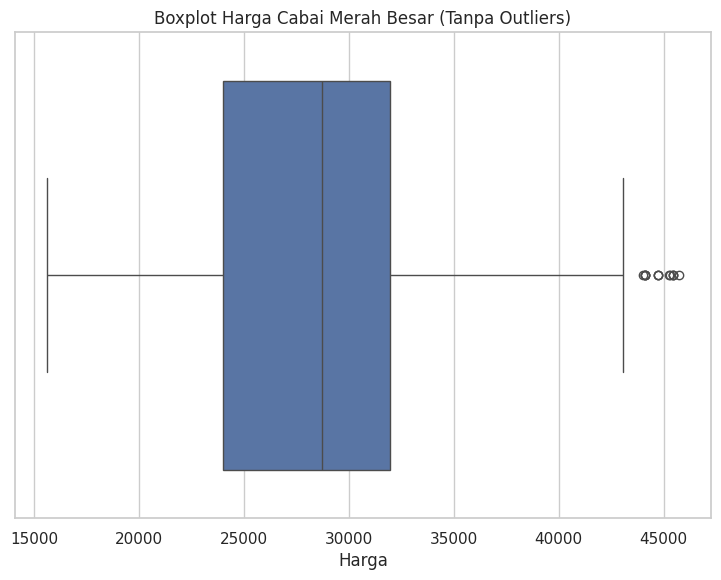

In [8]:
import pandas as pd

# Menghitung IQR untuk mendeteksi outliers
Q1 = data['Harga'].quantile(0.25)
Q3 = data['Harga'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan bawah untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data untuk menghapus outliers
data_clean = data[(data['Harga'] >= lower_bound) & (data['Harga'] <= upper_bound)]

# Tampilkan data setelah outlier dibersihkan
print("Data Setelah Outlier Dibersihkan:")
print(data_clean)

# Visualisasi harga setelah outlier dibersihkan
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot setelah membersihkan outlier
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_clean['Harga'])
plt.title('Boxplot Harga Cabai Merah Besar (Tanpa Outliers)')
plt.show()


## Cek Missing Values

In [9]:
# Menangani nilai yang hilang (misalnya, mengisi dengan rata-rata)
data['Harga'].fillna(data['Harga'].mean(), inplace=True)

# Atau, jika lebih banyak kolom yang hilang, bisa menghapus baris
# data.dropna(inplace=True)

<ipython-input-9-96c652d9cace>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Harga'].fillna(data['Harga'].mean(), inplace=True)


## Periksa Data Duplikat

In [10]:
# Memeriksa data duplikat
duplicates = data[data.duplicated()]
print(f"Data duplikat:\n{duplicates}")

# Menghapus data duplikat
data.drop_duplicates(inplace=True)

Data duplikat:
Empty DataFrame
Columns: [Tanggal, Harga]
Index: []


# Preprocessing Data

## Normalisasi Data

Dataframe Bersih:
     Tanggal  Harga
0 2020-01-01  19200
1 2020-01-08  19200
2 2020-01-15  19200
3 2020-01-22  20400
4 2020-01-29  30200


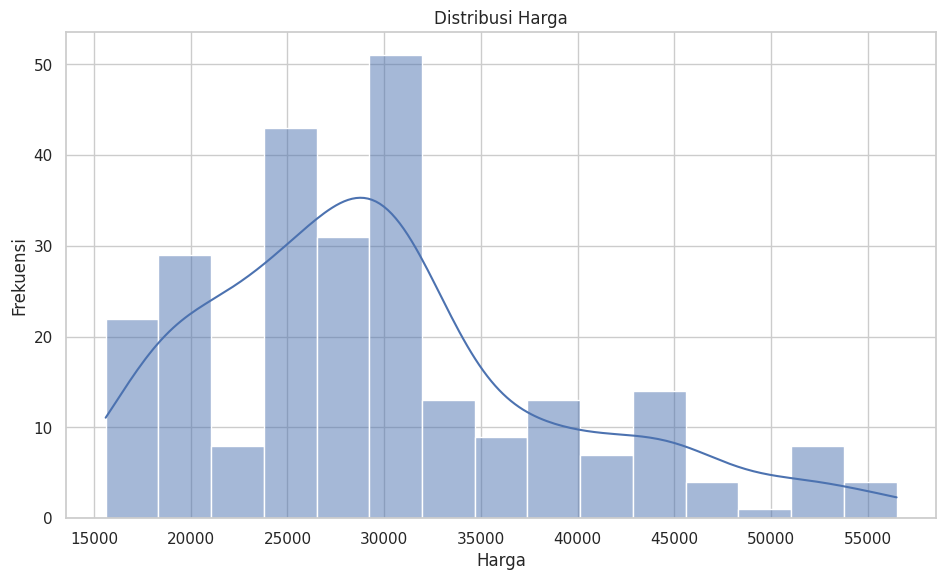


Cek Missing Values:
Tanggal    0
Harga      0
dtype: int64

Statistik Deskriptif:
                   Tanggal         Harga
count                  257    257.000000
mean   2022-06-15 00:00:00  29811.478599
min    2020-01-01 00:00:00  15600.000000
25%    2021-03-24 00:00:00  24150.000000
50%    2022-06-15 00:00:00  29150.000000
75%    2023-09-06 00:00:00  32900.000000
max    2024-11-27 00:00:00  56500.000000
std                    NaN   9206.428978


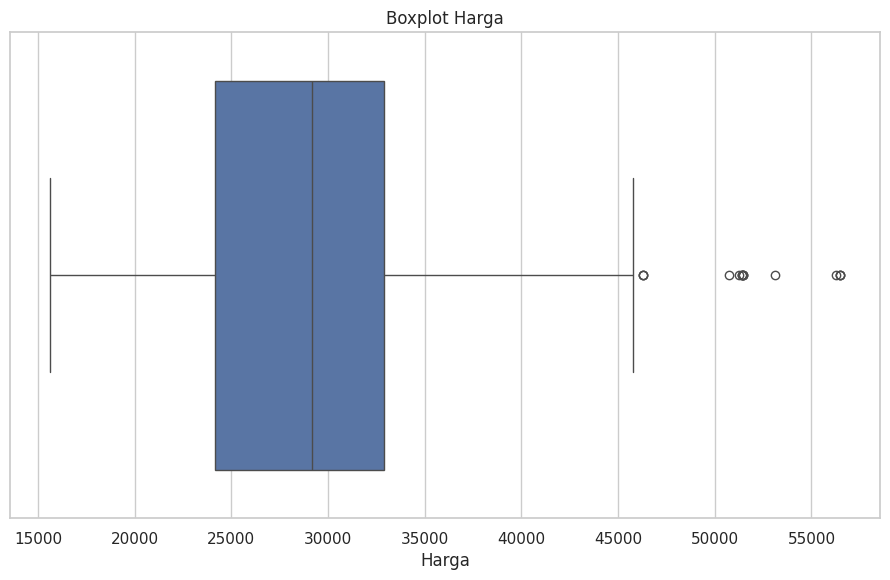

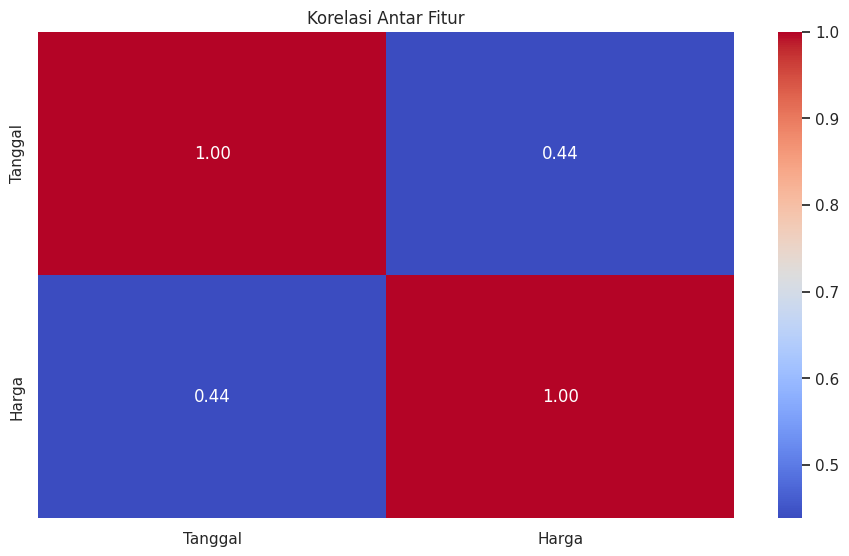

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat data dari file CSV
file_path = '/content/Tabel Harga Berdasarkan Komoditas(tugas1).csv'

# Membaca file dengan delimiter ';'
data = pd.read_csv(file_path, delimiter=';')

# Menghapus kolom yang seluruhnya kosong
data = data.dropna(axis=1, how='all')

# Membersihkan nama kolom dengan menghapus spasi ekstra
data.columns = data.columns.str.strip()

# Membersihkan spasi ekstra pada kolom 'Tanggal'
data['Tanggal'] = data['Tanggal'].str.replace(' ', '', regex=True)

# Memastikan kolom tanggal diubah menjadi tipe datetime tanpa format eksplisit
data['Tanggal'] = pd.to_datetime(data['Tanggal'], dayfirst=True, errors='coerce')

# Menampilkan beberapa baris pertama dari dataframe yang sudah bersih
print("Dataframe Bersih:")
print(data.head())

# 1. Visualisasi Distribusi Data
# Misalnya, kita memplot distribusi harga
plt.figure(figsize=(10, 6))
sns.histplot(data['Harga'], kde=True)
plt.title('Distribusi Harga')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

# 2. Cek Missing Values
print("\nCek Missing Values:")
print(data.isnull().sum())

# 3. Statistika Deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())

# 4. Deteksi Outliers dengan Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Harga'])
plt.title('Boxplot Harga')
plt.show()

# 5. Korelasi Antar Fitur (jika ada lebih dari satu fitur)
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur')
plt.show()


In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Memuat data dari file CSV
file_path = '/content/Tabel Harga Berdasarkan Komoditas(tugas1).csv'

# Membaca file dengan delimiter ';'
data = pd.read_csv(file_path, delimiter=';')

# Menghapus kolom yang seluruhnya kosong
data = data.dropna(axis=1, how='all')

# Membersihkan nama kolom dengan menghapus spasi ekstra
data.columns = data.columns.str.strip()

# Membersihkan spasi ekstra pada kolom 'Tanggal'
data['Tanggal'] = data['Tanggal'].str.replace(' ', '', regex=True)

# Memastikan kolom tanggal diubah menjadi tipe datetime tanpa format eksplisit
data['Tanggal'] = pd.to_datetime(data['Tanggal'], dayfirst=True, errors='coerce')

# Menampilkan beberapa baris pertama dari dataframe yang sudah bersih
print("Dataframe Bersih:")
print(data.head())

# Normalisasi Data (Menggunakan Min-Max Scaling)
scaler = MinMaxScaler()
price_data = data.iloc[:, 1]  # Mengambil harga dari kolom pertama setelah tanggal

# Melakukan normalisasi pada harga
data_normalized = scaler.fit_transform(price_data.values.reshape(-1, 1))

# Menampilkan hasil normalisasi beberapa nilai pertama
print("Data Harga yang Dinormalisasi:")
print(data_normalized[:5])  # Menampilkan 5 data pertama yang sudah dinormalisasi

# Menyimpan data normalisasi untuk digunakan dalam sliding window
data_normalized = data_normalized.flatten()  # Mengubah menjadi 1D array

Dataframe Bersih:
     Tanggal  Harga
0 2020-01-01  19200
1 2020-01-08  19200
2 2020-01-15  19200
3 2020-01-22  20400
4 2020-01-29  30200
Data Harga yang Dinormalisasi:
[[0.08801956]
 [0.08801956]
 [0.08801956]
 [0.11735941]
 [0.35696822]]


Beberapa windows pertama:
Window 1: [0.08801956 0.08801956 0.08801956 0.11735941] -> Label: 0.35696821515892424
Window 2: [0.08801956 0.08801956 0.11735941 0.35696822] -> Label: 0.35696821515892424
Window 3: [0.08801956 0.11735941 0.35696822 0.35696822] -> Label: 0.35696821515892424


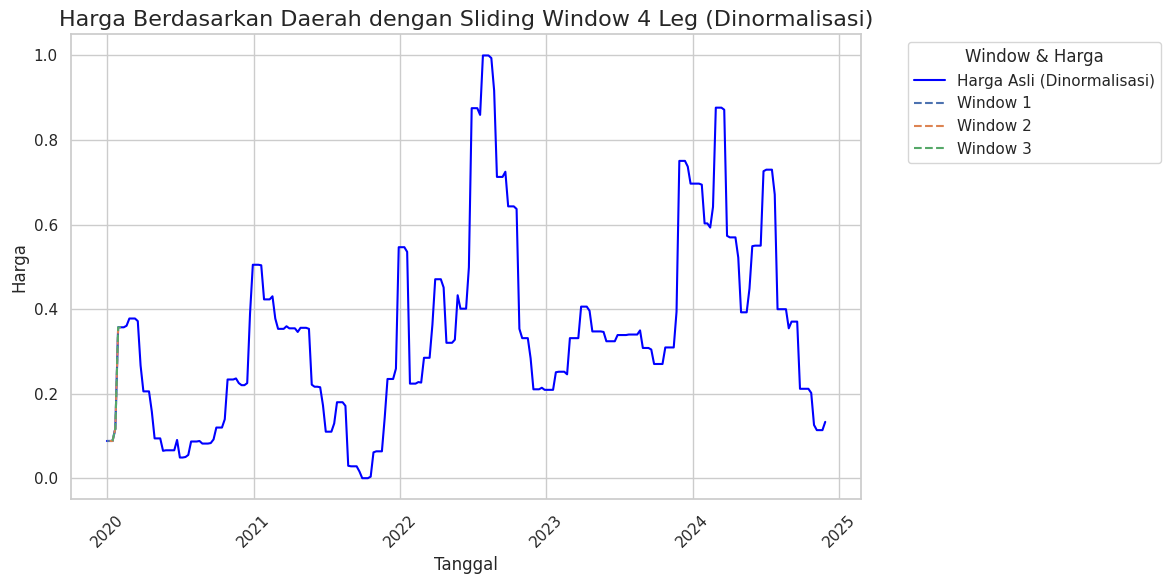

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk membuat sliding window dengan 4 leg
def create_sliding_window(data, window_size=4):
    windows = []
    labels = []

    # Iterasi melalui data untuk membuat windows
    for i in range(len(data) - window_size):
        window = data[i:i + window_size]  # Ambil window dengan 4 leg (harga 4 hari berturut-turut)
        windows.append(window)
        labels.append(data[i + window_size])  # Harga setelah window (hari ke-5)

    return windows, labels

# Tentukan ukuran jendela (4 leg)
window_size = 4
windows, labels = create_sliding_window(data_normalized, window_size)

# Menampilkan beberapa windows pertama
print(f"Beberapa windows pertama:")
for i in range(3):  # Menampilkan 3 window pertama
    print(f"Window {i + 1}: {windows[i]} -> Label: {labels[i]}")

# Mengatur gaya plotting
sns.set(style="whitegrid")

# Memplot data dengan garis dan jendela sliding (misalnya harga dengan 4 leg)
plt.figure(figsize=(12, 6))

# Memplot data asli yang sudah dinormalisasi
plt.plot(data['Tanggal'], data_normalized, label='Harga Asli (Dinormalisasi)', color='blue')

# Menambahkan jendela sliding ke plot
for i in range(3):  # Menampilkan beberapa window pertama
    plt.plot(data['Tanggal'].iloc[i:i + window_size], windows[i], label=f'Window {i + 1}', linestyle='--')

# Menambahkan detail pada plot
plt.title('Harga Berdasarkan Daerah dengan Sliding Window 4 Leg (Dinormalisasi)', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga', fontsize=12)
plt.legend(title="Window & Harga", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Visualisasi Data

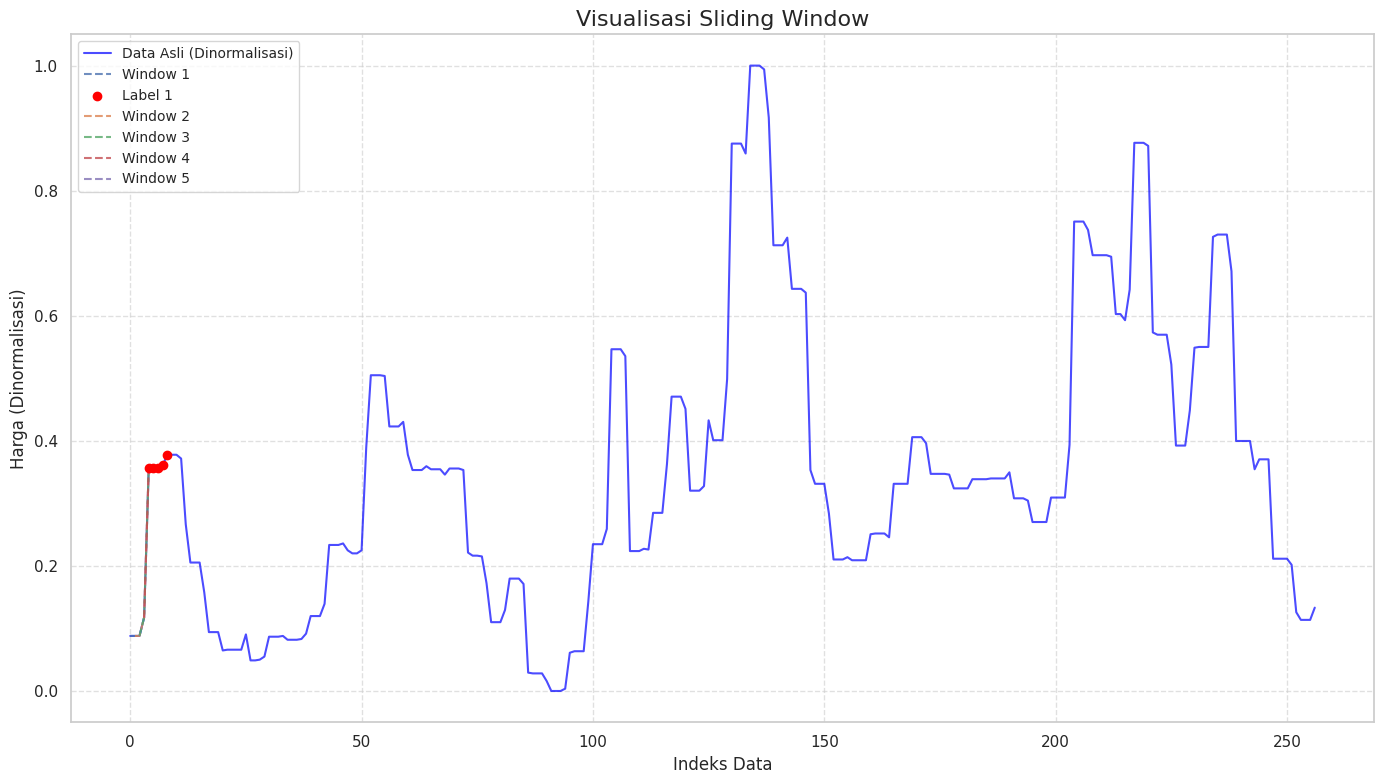

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualisasi hasil sliding window
def visualize_sliding_window(data_original, sliding_windows, labels, window_size):
    plt.figure(figsize=(14, 8))

    # Plot data asli (dinormalisasi)
    plt.plot(data_original, label='Data Asli (Dinormalisasi)', color='blue', alpha=0.7)

    # Visualisasi beberapa window pertama
    num_windows_to_plot = min(5, len(sliding_windows))  # Plot maksimal 5 window pertama
    for i in range(num_windows_to_plot):
        window_indices = range(i, i + window_size)  # Indeks data untuk window
        plt.plot(window_indices, sliding_windows[i], label=f'Window {i+1}', linestyle='--', alpha=0.8)
        # Menandai label (target) dari setiap window
        plt.scatter(i + window_size, labels[i], color='red', label=f'Label {i+1}' if i == 0 else '', zorder=5)

    # Menambahkan detail plot
    plt.title('Visualisasi Sliding Window', fontsize=16)
    plt.xlabel('Indeks Data', fontsize=12)
    plt.ylabel('Harga (Dinormalisasi)', fontsize=12)
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Menjalankan fungsi visualisasi
visualize_sliding_window(
    data_original=data_normalized,
    sliding_windows=np.array(windows),
    labels=np.array(labels),
    window_size=window_size
)


# Latih Data

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

# Menyiapkan X dan y dari sliding window
X = np.array(windows)  # Fitur: windows dengan 4 leg
y = np.array(labels)    # Target: harga setelah window

# Menampilkan bentuk data
print(f'Bentuk X: {X.shape}')
print(f'Bentuk y: {y.shape}')


Bentuk X: (253, 4)
Bentuk y: (253,)


In [16]:
# Menggunakan harga dinormalisasi sebagai input (X) dan target (y)
X_normalized = np.array(windows)  # windows dari sliding window
y = np.array(labels)  # labels dari sliding window

In [17]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Menampilkan bentuk data training dan testing
print(f'Bentuk X_train: {X_train.shape}, X_test: {X_test.shape}')
print(f'Bentuk y_train: {y_train.shape}, y_test: {y_test.shape}')

Bentuk X_train: (202, 4), X_test: (51, 4)
Bentuk y_train: (202,), y_test: (51,)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inisialisasi model regresi linear
model = LinearRegression()

# Melatih model dengan data training
model.fit(X_train, y_train)

# Memprediksi harga pada data testing
y_pred = model.predict(X_test)
y_pred

array([0.6714434 , 0.37607866, 0.20166871, 0.70636847, 0.43988029,
       0.340356  , 0.40587441, 0.31286253, 0.25257416, 0.10694394,
       0.12842617, 0.54360852, 0.55455845, 0.50043157, 0.64579181,
       0.35528392, 0.31316337, 0.10935693, 0.17249887, 0.06971875,
       0.70811688, 0.08567232, 0.31918694, 0.22419871, 0.10090741,
       0.39844914, 0.12572356, 0.66990448, 0.20088228, 0.33963259,
       0.3471226 , 0.2622438 , 0.27930375, 0.21761967, 0.54658303,
       0.07084086, 0.0511236 , 0.08563632, 0.1142195 , 0.67819263,
       0.27489943, 0.32145421, 0.34370739, 0.34808132, 0.22799985,
       0.35661493, 0.11093485, 0.35516366, 0.66354314, 0.31196895,
       0.32487703])

# Modelling Data

## Regresi Linear

Root Mean Squared Error (RMSE): 0.06000970751775029


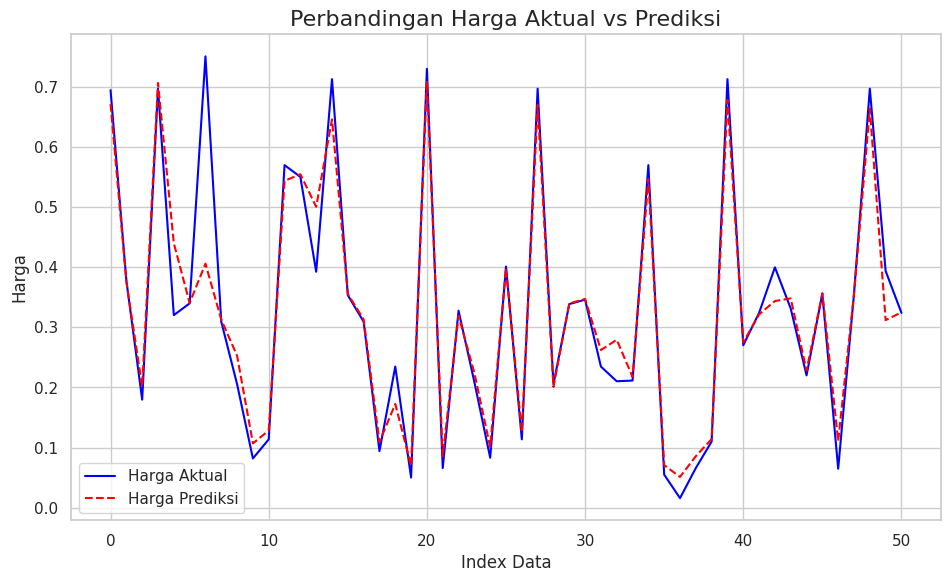

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

# Inisialisasi model regresi linear
model = LinearRegression()

# Melatih model dengan data training
model.fit(X_train, y_train)

# Memprediksi harga pada data testing
y_pred = model.predict(X_test)

# Menghitung RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Menampilkan hasil RMSE
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualisasi hasil prediksi vs actual
plt.figure(figsize=(10, 6))

# Plot harga aktual vs harga prediksi
plt.plot(y_test, label='Harga Aktual', color='blue')
plt.plot(y_pred, label='Harga Prediksi', color='red', linestyle='--')

# Menambahkan judul dan label
plt.title('Perbandingan Harga Aktual vs Prediksi', fontsize=16)
plt.xlabel('Index Data', fontsize=12)
plt.ylabel('Harga', fontsize=12)
plt.legend()

# Menampilkan plot
plt.show()


In [20]:
from sklearn.metrics import mean_absolute_error

# Menghitung MAPE secara manual
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Menghitung MAPE untuk model
mape = mean_absolute_percentage_error(y_test, y_pred)

# Menampilkan hasil MAPE
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 16.45%


### Prediksi Harga Minggu Depan

In [21]:
# Prediksi harga untuk minggu berikutnya (menggunakan data terakhir dari training set)
last_window = X[-1].reshape(1, -1)  # Mengambil window terakhir
predicted_price_next_week = model.predict(last_window)

# Menampilkan prediksi harga minggu depan
predicted_price = scaler.inverse_transform(predicted_price_next_week.reshape(-1, 1))[0][0]
print(f'Prediksi harga minggu depan: {predicted_price}')


Prediksi harga minggu depan: 20927.286342481024


# Streamlit

In [27]:
!pip install streamlit -q
!pip install pyngrok -q

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Judul aplikasi
st.title("Prediksi Harga Cabai Merah Besar di Jawa Timur")

# Deskripsi aplikasi
st.write("""
Aplikasi ini menggunakan model **Regresi Linear** untuk memprediksi harga cabai berdasarkan data historis.
""")

# Input Data
st.sidebar.header("Input Data Harga")
uploaded_file = st.sidebar.file_uploader("Unggah file CSV harga cabai", type=["csv"])

if uploaded_file is not None:
    # Membaca data dengan delimiter titik koma
    data = pd.read_csv(uploaded_file, delimiter=";")

    # Menampilkan beberapa baris pertama data untuk memastikan formatnya
    st.write("Data Harga Cabai:")
    st.dataframe(data.head())

    # Memastikan kolom Tanggal terpisah dengan benar
    data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y')

    # Pilih kolom harga
    harga = st.sidebar.selectbox("Pilih kolom harga", data.columns[1:])

    # Sliding Window
    window_size = 4
    def create_sliding_window(data, window_size=4):
        windows = []
        labels = []
        for i in range(len(data) - window_size):
            windows.append(data[i:i + window_size])
            labels.append(data[i + window_size])
        return np.array(windows), np.array(labels)

    X, y = create_sliding_window(data[harga].values, window_size)

    # Split data
    split = int(0.8 * len(X))
    X_train, y_train = X[:split], y[:split]
    X_test, y_test = X[split:], y[split:]

    # Training model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)

    # Menampilkan hasil
    st.write("Hasil Prediksi:")
    result_df = pd.DataFrame({"Aktual": y_test, "Prediksi": y_pred})
    st.dataframe(result_df)

    # Evaluasi
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    st.write(f"MAPE: {mape:.2f}%")

    # Prediksi harga minggu depan
    if st.button("Prediksi Minggu Depan"):
        last_window = data[harga].values[-window_size:]
        next_pred = model.predict([last_window])[0]
        st.write(f"Prediksi harga minggu depan: {next_pred:.2f}")

In [28]:
from pyngrok import ngrok

!streamlit run /content/app.py &>/dev/null&
ngrok.set_auth_token("2pz9qygKoJZ60A95H495InyWlbF_7GAzwQy8SEZaxdo8qeS9U")
url = ngrok.connect(8501)
print(f"Aplikasi Streamlit Anda tersedia di {url}")

Aplikasi Streamlit Anda tersedia di NgrokTunnel: "https://d6ec-34-125-204-185.ngrok-free.app" -> "http://localhost:8501"


link streamlit saya: https://huggingface.co/spaces/lufthan/psd